In [18]:
import numpy as np
from scipy import signal
import librosa
import matplotlib.pyplot as plt
import soundfile as sf
from scipy.signal import medfilt
from scipy.fftpack import fft, fftfreq, ifft
import soundfile as sf
file_path = "Sample-Data-Cafe-1.wav"
y, sr = librosa.load(file_path, sr=None)

<>:21: SyntaxWarning: invalid escape sequence '\o'
<>:22: SyntaxWarning: invalid escape sequence '\h'
<>:21: SyntaxWarning: invalid escape sequence '\o'
<>:22: SyntaxWarning: invalid escape sequence '\h'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_27576\2748861127.py:21: SyntaxWarning: invalid escape sequence '\o'
  plt.xlabel("$\omega$ (cycles/s)")
C:\Users\ASUS\AppData\Local\Temp\ipykernel_27576\2748861127.py:22: SyntaxWarning: invalid escape sequence '\h'
  plt.ylabel("$|\hat{y}|$")


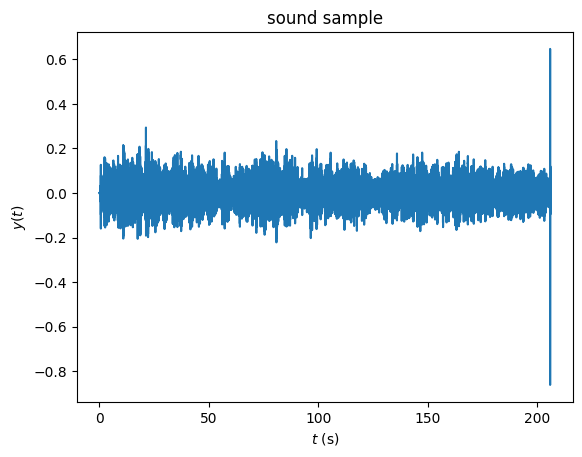

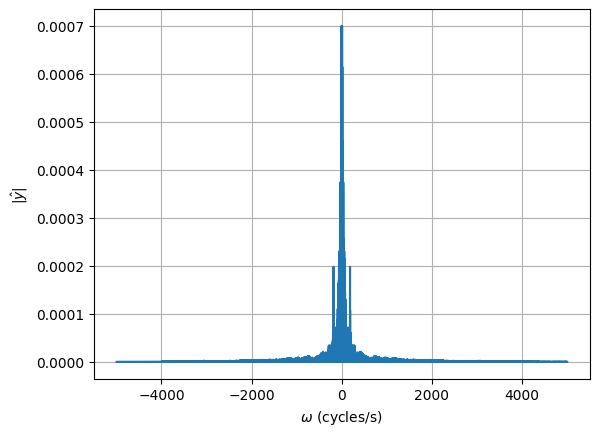

In [5]:
samplingFreq = 10000 # sampled at 10 kHz frequency = 10000 sample/s
t = np.array(range(0, len(y))) / sr

# compute spectrum
yhat=fft(y)
fcycles=fftfreq(len(y),1/samplingFreq)

100000
9895936

# plot sound signals
plt.figure()
plt.plot(t, y)
plt.title("sound sample")
plt.ylabel("$y(t)$");
plt.xlabel("$t$ (s)");

# plot fft result
plt.figure()
plt.plot(fcycles,np.absolute(yhat)/len(y))
plt.xlabel("$\omega$ (cycles/s)")
plt.ylabel("$|\hat{y}|$")
plt.grid()

<>:4: SyntaxWarning: invalid escape sequence '\o'
<>:5: SyntaxWarning: invalid escape sequence '\h'
<>:4: SyntaxWarning: invalid escape sequence '\o'
<>:5: SyntaxWarning: invalid escape sequence '\h'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_27576\3202895264.py:4: SyntaxWarning: invalid escape sequence '\o'
  plt.xlabel("$\omega$ (cycles/s)")
C:\Users\ASUS\AppData\Local\Temp\ipykernel_27576\3202895264.py:5: SyntaxWarning: invalid escape sequence '\h'
  plt.ylabel("$|\hat{y}|$")


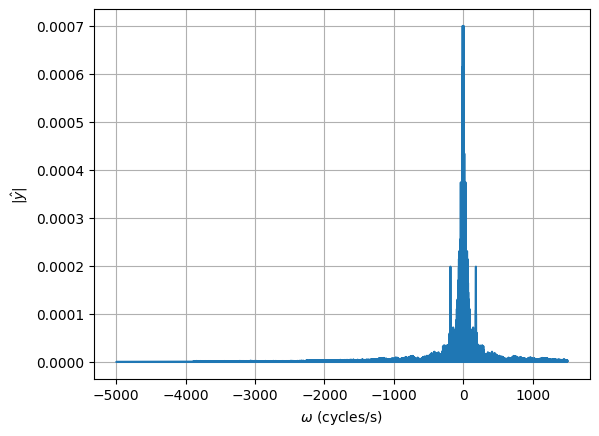

In [11]:
# plot fft result
plt.figure()
plt.plot(fcycles[fcycles<1500],np.absolute(yhat[fcycles<1500])/len(y))
plt.xlabel("$\omega$ (cycles/s)")
plt.ylabel("$|\hat{y}|$")
plt.grid()

In [20]:
# Butterworth filter
wc = 2*np.pi*1000; # Frekuensi cut-off (rad/s), dimana fc = 1000 Hz
n = 2;          # n= Orde Filter

# Hituung Koefisien Butterworth filter
a = np.zeros(n+1)
gamma = np.pi/(2.0*n)
a[0] = 1; # Koef. pertama selalu 1
for k in range(0,n):
    rfac = np.cos(k*gamma)/np.sin((k+1)*gamma)
    a[k+1] = rfac*a[k]; # Koef. Rekursif lain

print("Koef. Polinomial Butterworth (a_i):                              " + str(a))

# Adjust the cutoff frequency
c = np.zeros(n+1)
for k in range(0,n+1):
    c[n-k] = a[k]/pow(wc,k)

print("Koef. Polinomial Butterworth dengan Penyesuaian frekuensi (c_i): " + str(c))

Koef. Polinomial Butterworth (a_i):                              [1.         1.41421356 1.        ]
Koef. Polinomial Butterworth dengan Penyesuaian frekuensi (c_i): [5.16944815e-08 3.21541541e-04 1.00000000e+00]


In [21]:
# Low-pass filter
w0 = 2*np.pi*1000; # frekuensi cut-off (rad/s), frekuensi cut-off dipilih 1000 Hz
num = [1];      # koefisien pembilang (numerator) dari fungsi alih
den = c;        # koefisien penyebut (denominator) dari fungsi alih
lowPass = signal.TransferFunction(num,den) # Generate fungsi alih

In [22]:
# # Mengubah Fungsi alih analog menjadi Fungsi alih diskrit dengan delta_t = 1/samplingFrequency
dt = 1.0/samplingFreq
discreteLowPass = lowPass.to_discrete(dt,method='gbt',alpha=0.5)
print(discreteLowPass)

TransferFunctionDiscrete(
array([0.03557627, 0.07115254, 0.03557627]),
array([ 1.        , -1.40012496,  0.54243004]),
dt: 0.0001
)


Filter coefficients b_i: [0.03557627 0.07115254 0.03557627]
Filter coefficients a_i: [ 1.40012496 -0.54243004]


Text(0, 0.5, '$y(t)$')

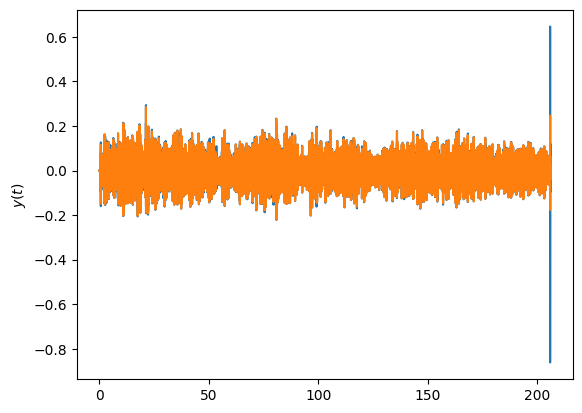

In [23]:
# Panggil koefisien Filter dari Fungsi alih diskrit sebelumnya (dengan negative sign)
b = discreteLowPass.num
a = -discreteLowPass.den
print("Filter coefficients b_i: " + str(b))
print("Filter coefficients a_i: " + str(a[1:]))

# Implementasi Filter Sinyal Menggunakan Persamaan Beda
Nb = len(b)
yfilt = np.zeros(len(y))
for m in range(3,len(y)):
    yfilt[m] = b[0]*y[m]
    for i in range(1,Nb):
        yfilt[m] += a[i]*yfilt[m-i] + b[i]*y[m-i]

# Plot Sinyal Input x(n) dan Output terfilter y(n)
plt.figure()
plt.plot(t,y)
plt.plot(t,yfilt)
plt.ylabel("$y(t)$")

In [24]:
sf.write("bw_lowpass_audible.wav", yfilt, sr)